

## License Information

---

This file is distributed as part of _swprepost_, a Python package for surface wave inversion pre- and post-processing.

    Copyright (C) 2019-2021 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.

## About SWinvert, _swprepost_, _swbatch_, and this notebook

---

[SWinvert](https://doi.org/10.1093/gji/ggaa426) is a workflow for performing
rigorous 1-D surface wave inversion (Vantassel and Cox, 2021).
[_swprepost_](https://github.com/jpvantassel/swprepost/) is a Python package for
performing surface wave inversion pre- and post-processing (Vantassel, 2020).
[_swbatch_](https://github.com/jpvantassel/swbatch) is an application on the
[DesignSafe-CI](https://www.designsafe-ci.org/) (Vantassel et al., 2020) which
allows users to perform batch-style surface wave inversions on the high
performance cluster Stampede2 directly from Jupyter (recommended, instructions
and code provided below) or through the web interface (not recommended,
instructions provided below).

This notebook is __an__ example of a workflow that can be built using the
concepts from SWinvert and the tools _swprepost_ and _swbatch_.
The SWinvert workflow, _swprepost_, _swbatch_, and this notebook were developed
by Joseph P. Vantassel, under the supervision of Brady R. Cox at The University
of Texas at Austin. If you use this notebook in your research or consulting we
ask that you please cite the following:

> Vantassel, J.P. and Cox, B.R. (2021). SWinvert: a workflow for performing
> rigorous 1-D surface wave inversions. Geophysical Journal International
> 224, 1141-1156. https://doi.org/10.1093/gji/ggaa426

> Vantassel, J., (2020). jpvantassel/swprepost: latest (Concept). Zenodo. https://doi.org/10.5281/zenodo.3839998

> Vantassel, J., Gurram, H., and Cox, B., (2020). jpvantassel/swbatch: latest (Concept). Zenodo. https://doi.org/10.5281/zenodo.3840546

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `swprepost` and `swbatch`, please use the citation tool
on the `swprepost` [archive](https://doi.org/10.5281/zenodo.3839998) and the
`swbatch` [archive](https://doi.org/10.5281/zenodo.3840545)._

## Using this notebook

This notebook has four main parts:

1. [Defining the inversion target](#Defining-the-Inversion-Target)
2. [Selecting the inversion parameterizations](#Selecting-the-Inversion-Parameterizations)
3. [Running the inversion](#Running-the-Inversion)
4. [Post-processing the inversion results](#Post-processing-the-Inversion-Results)

While the below workflow proposes a relatively straightforward and
production-tested approach to surface wave inversion, please feel free to modify
and expand upon what is provided. Importantly, please note that this notebook
utilizes only a fraction of the functionality available fromm the _swprepost_
package and so be sure to first check if the additional functionality already
exists within _swprepost_. If you have implemented something that you believe
would be of interest to other users please feel free to open an issue on GitHub
detailing the problem you are proposing to solve with your new feature and then
providing the solution. If you are unfamiliar with GitHub issues, please send
me (Joseph Vantasel) an email.

## An important final note

This notebook is intended as a tool to expedite surface wave inversion, however
it is of paramount importance that the user have some working knowledge of
surface wave inversion to understand what they are doing. We strongly recommend
that this notebook not be used as "black-box" for surface wave inversion. At a
minimum we recommend the user to read Vantassel and Cox (2021), citation above,
to familiarize themselves with the basics of surface wave inversion and the
specific recommendations presented therein.


## Install _swprepost_ and Dependencies

This will install _swprepost_ if you have not done so already.


In [ ]:
!pip install --user swprepost

## Imports and Function Definitions

In [1]:
import glob, re, os

import numpy as np
import matplotlib.pyplot as plt

import swprepost

def plot_target(target):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6, 3), dpi=150)
    target.plot(x="frequency", y="velocity", ax=axs[0])
    target.plot(x="wavelength", y="velocity", ax=axs[1])
    axs[1].set_ylabel("")
    axs[1].legend()
    return (fig, axs)

print("Imports successful, you may proceed.")

Imports successful


# Defining the Inversion Target

## Importing the Experimental Dispersion Data

1. Select the desired approach by commenting/uncommenting the appropriate line in the cell below.
2. Review the figure to ensure your data has loaded correctly, then proceed to the next cell.

[Back to top](#License-Information)

Import successful, you may proceed.


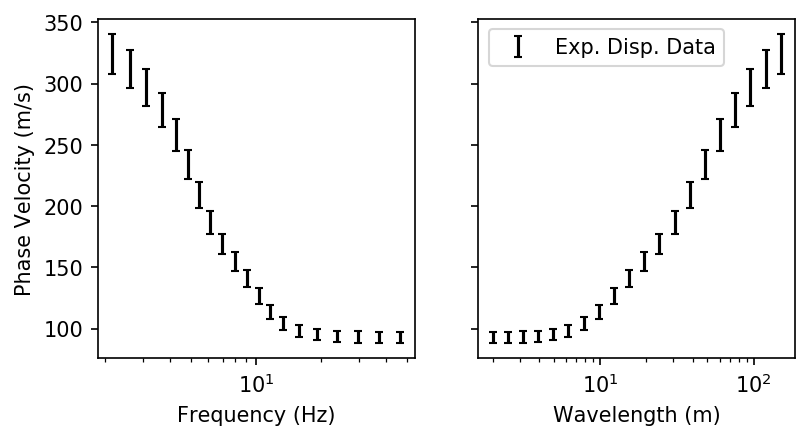

In [6]:
# Approach 1: Import from comma seperated text file (see documentation for details).
target = swprepost.Target.from_csv("example.csv")

# Approach 2: Import from v2 dinver-style text file (see documentation for details).
# target = swprepost.Target.from_txt_dinver("example_dv2.txt", version="2")

# Approach 3: Import from v3 dinver-style text file (see documentation for details).
# target = swprepost.Target.from_txt_dinver("example_dv3.txt", version="3")


fig, axs = plot_target(target)
print("Import successful, you may proceed.")

## Resampling the Experimental Dispersion Data

If you have not yet resample your experimental dispersion data, follow the
instructions below. If you have already resampled your experimental data, you
may skip this cell.

1. Select the `domain` in which you wish to resample. _wavelength is recommended._
2. Select the `resample_type` either log or linear. _log is recommended._
3. Select the minimum (`pmin`), maximum (`pmax`), and number of points (`pn`) after resampling. Note that `pmin` and `pmax` are in terms of the selected `domain` (i.e., either frequency or wavelength). _20-30 points are recommended._
4. Select the `target_name` and `version` of Geopsy used to define the output `.target` file.
5. Review the figure to ensure your data has been resampled correctly, then proceed to the next cell.

[Back to top](#License-Information)

Resample successful, you may proceed.


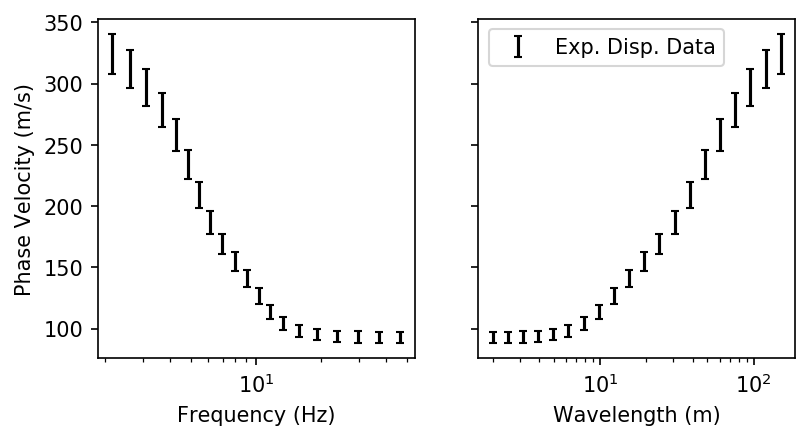

In [7]:
domain = "wavelength"       # "frequency" or "wavelength", "wavelength" is recommended
res_type = "log"            # "log" or 'linear', "log" is recommended.
pmin = 2                    # Minimum value after resampling in units of domain
pmax = 150                  # Maximum value after resampling in units of domain
pn = 20                     # Number of samples, 20-30 points are recommended.

target.easy_resample(pmin=pmin, pmax=pmax, pn=pn, res_type=res_type, domain=domain, inplace=True)
fig, axs = plot_target(target)
print("Resample successful, you may proceed.")

## Save Target to Disk

After importing your experimental dispersion data and completing any desired
resampling, use the cell below to create the `0_targets` directory if
it does not exist and writing your newly created `.target` file. You
may confirm that the write was sucessful by examining the created `.target`
file in the Dinver graphical user interface.


In [4]:
target_name = "Tar5"        # Name of target file (no .target suffix)
version = "2"               # Major version of Geopsy "2" or "3"

# Save to Disk
if os.path.isdir("0_targets/")==False:
    os.mkdir("0_targets/")
target.to_target(f"0_targets/{target_name}", version=version)

if os.path.exists(f"0_targets/{target_name}.target"):
    print(f"{target_name}.target exists, you may proceed.")

Tar5.target exists, you may proceed.


## Selecting the Inversion Parameterizations

1. Enter upper and lower limits for all layers: compression wave velocity `vp`,
shear wave velocity `vs`, Poisson's ratio `pr`, and mass density `rh`. `vp` and
`vs` are in units of `m/s` and `rh` in units of `kg/m**3`.
2. Select whether you will allow `vp` and `vs` to decrease with depth
(inverely-dispersive) or to be strictly increasing (normally dispersive). In
general unless there is clear evidence in the experimental dispersion data or
geologic setting that a velocity reversal exists, the normally dispersive
assumption is recommended.
3. Select the Layering by Number `LN` and/or Layering Ratio `LR`
parameterizations you would like to consider in your inversion. Note that this
notebook assumes `vp` and `vs` follow the same underlying layering scheme. This
may or may not be ideal depending on your dataset, however we have found this
type of parameterization to work well in many situations. Only a
single layer is assumed for `pr` and `rh`.
4. After making your selections, run the cell to write the parameterizations
to disk. A `1_parameters` directory will be created if one does not exist. If
you would like to create more complex parameterizations you may either use
other existing functionality in _swprepost_ (see documentation for details) or
use the Dinver graphical user interface to modify the base parameterizations
created using the cell below.

__Be cautious when making your selections as they can strongly bias your inversion results.__

[Back to top](#License-Information)

In [5]:
# Minimum and maximum for all layers. See above instructions for details.
vp_min, vp_max, vp_dec = 100., 5000., False
vs_min, vs_max, vs_dec = 80., 3500., False
pr_min, pr_max = 0.2, 0.5
rh_min, rh_max = 2000., 2000.

# Layering by Number (LN) parameterizations to consider. Add or remove as desired.
lns = [4, 5, 7, 9]

# Layering Ratios (LRs) parameterizations to consider. Add or remove as desired.
lrs = [1.2, 1.5, 2.0, 3.0]

# Depth factor, typically 2 or 3.
depth_factor = 2

# Minimum and maximum wavelength, selected from experimental disperison data by default.
wmin, wmax = min(target.wavelength), max(target.wavelength)

# Mass density.
if (rh_min - rh_max) < 1:
    rh = swprepost.Parameter.from_fx(rh_min)
else:
    rh = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=1, par_min=rh_min, par_max=rh_max, par_rev=False)
    
# Poisson's ratio
if (pr_max - pr_min) < 0.05:
    raise ValueError(f"Difference between pr_min and pr_max is too small ({pr_max-pr_min:2f}<0.05), use larger range.")
else:
    pr = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=1, par_min=pr_min, par_max=pr_max, par_rev=False)

# Make 1_parameters directory.
if not os.path.isdir("1_parameters/"):
    os.mkdir("1_parameters/")

# Parameterize Vs using Layering by Number (LN)
for ln in lns:
    vs = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=ln, par_min=vs_min, par_max=vs_max, par_rev=vs_dec, depth_factor=depth_factor)
    vp = swprepost.Parameter.from_parameter_and_link(par_min=vp_min, par_max=vp_max, par_rev=vp_dec, existing_parameter=vs, ptype="vs")
    par = swprepost.Parameterization(vp=vp, pr=pr, vs=vs, rh=rh)
    par.to_param(f"1_parameters/LN{ln}", version=version)

# Parameterize Vs using Layering Ratio (LR)
for lr in lrs:
    vs = swprepost.Parameter.from_lr(wmin=wmin, wmax=wmax, lr=lr, par_min=vs_min, par_max=vs_max, par_rev=vs_dec, depth_factor=depth_factor)
    vp = swprepost.Parameter.from_parameter_and_link(par_min=vp_min, par_max=vp_max, par_rev=vp_dec, existing_parameter=vs, ptype="vs")
    par = swprepost.Parameterization(vp=vp, pr=pr, vs=vs, rh=rh)
    par.to_param(f"1_parameters/LR{int(lr*10)}", version=version)

nparam = len(lns) + len(lrs)
if len(glob.glob("1_parameters/*.param")) == nparam:
    print(f"All {nparam} .param files exist, you may proceed.")

All 8 .param files exists, you may proceed.


## Running the Inversion

There are two ways to run your inversion(s):

1. Locally using the `.target` and `.param` files from above. (Not Recommended, for reasons provided below)
2. Remotely using the DesignSafe-CI application _swbatch_. (Recommended)

See the appropriate section below for instructions.

### If running locally

Running locally is generally not recommended as the DesignSafe-CI
application _swbatch_ has been specifically designed to integrate with the
inputs generated by this notebook. However, as some will undoubtedly still want
to run their inversion's locally instructions are provided below.

1. Load the `.target` and `.param` files into Dinver. The `.target` and `.param`
files are located in the `0_targets` and `1_parameters` directories,
respectively.
2. Setup the inversion's tuning parameters. Full details are provided in
Vantassel and Cox (2021), however for completeness a brief summary is provided
here. Number of independent runs (i.e., Ntrial) should be greater than 3,
It*Ns > 50,000 (e.g., It=200, Ns=250), Nr ~= 100, Ns0>Nr (e.g., Ns0=10000).
3. After completing your inversions export the desired number of ground models
and dispersion curves to text format, using the Geopsy command line interface.
Refer to the provided sample outputs in the `3_text` directory for the naming
conventions assumed by this notebook in order to be able to use the
post-processing provided below.

### If running remotely on DesignSafe-CI

This functionality is only available to those running this notebook through the DesignSafe-CI.

1. Read through the cell below and select your inversion tuning parameters.
2. When done, run the cell and inspect the output.
3. If there is an issue edit the cell and run it again.
4. Finally, run the following cell to launch your inversion on Stampede2.
5. Monitor the progress of your inversion by navigating to `Workspace > Tools & Application > Job Status`.

[Back to top](#License-Information)

In [ ]:
# from agavepy.agave import Agave
# from agavepy.async import AgaveAsyncResponse
# ag=Agave.restore()

# # Inputs
# job_name = "EX0"      # Name of job (will appear in workspace)
# run_time = "00:05:00" # Runtime for simulation in (HH:MM:SS) format
# run_name = "EX"       # Run name (will appear as prefix to groundmodel and dispersioncurve files)
# n_trials = "2"        # Number of trials to perform, a minimum of 3 is recommended.
# It = "20"             # Number of iterations, a minimum of 200 is recommended.
# Ns = "25"             # Number of samples per iteration, a minimum of 250 is recommended.
# Nr = "100"            # Number of models to consider when resampling, 100 is recommended.
# Ns0 = "100"           # Number of initial samples, any value greater than Nr is recommended.

# # Outputs
# nprofile = "3"        # Number of ground models and dispersion curves to export
# # Frequency sampling of theoretical dispersion curves
# fmin = "1"            # Minimum frequency in Hz
# fmax = "50"           # Maximum frequency in Hz
# fnum = "25"           # Number of frequency samples

# full=%pwd
# usr=ag.profiles.get()["username"]
# shrt=full[20::]
# job_description = {
#     "name":job_name,
#     "appId":"swbatch-0.2.1",
#     "batchQueue":"development",
#     "nodeCount":1,
#     "maxRunTime":run_time,
#     "archive":True,
#     "inputs":{
#         "workingDirectory":"agave://designsafe.storage.default/"+usr+shrt
#     },
#     "parameters":{
#       "name":run_name,
#       "ntrial":n_trials,
#       "Ns0":Ns0,
#       "It":It,
#       "Ns":Ns,
#       "Nr":Nr,
#       "nprofile":nprofile,
#       "fnum":fnum,
#       "fmin":fmin,
#       "fmax":fmax,
#     }
# }
# print("Confirm job information before continuing: ")
# display(job_description)

In [ ]:
# # Run cell to launch simulation
# job = ag.jobs.submit(body=job_description)
# asrp = AgaveAsyncResponse(ag, job)

## Post-processing the Inversion Results

### Importing the Data

In order for the data to import correctly you must provide a relative or full path to the `3_text` directory.

1. For those running this as a tutorial, no changes are necessary here.
2. For those running this locally, it is recommended you follow the same directory structure provided in the example, and therefore no changes are necessary.
3. For those running this remotely on DesignSafe-CI, you will need to replace the `full_path` variable in the cell below with the full path to the `3_text` directory containing your results. For your convenience, an incomplete `full_path` variable is provided below and commented out. To complete the path you will need to replace `<path_here>` with the actual path. The easiest way to find the full path to your data is by using the Job Status viewer by selecting `Research Workbench>Job Status>Your Desired Job>View` which will bring you to your job results. Alternatively, you can move the `3_text` directory form the job archive into the current directory, in which no changes to `full_path` are necessary.

[Back to top](#License-Information)

In [ ]:
ndc = 1             # Number of dispersion curves, may use "all"
nrayleigh = 1       # Number of rayleigh modes, may use "all"
nlove = 0           # Number of love modes, may use "all"
ngm = 1             # Number of ground models, may use "all"

full_path = "./3_text/"
# full_path = "/home/jupyter/MyData/archive/<path_here>/3_text/"
fnames = glob.glob(full_path + "*_DC.txt")
fnames.sort(key=lambda x: int(re.findall(r".*[\\/].*_.*[LF][TRN][IL]?(\d+)_Tr\d+_DC.txt$",x)[0]))

dcs, gms = {}, {}
for fname in fnames:
    filename, partype, parnumber, seed = re.findall(r".*[\\/](.*_.*([LF][TRN][IL]?)(\d+)_Tr(\d+)_DC.txt)$", fname)[0]
    
    # Divide LR by 10
    if partype in ['LR']:
        parnumber = str(int(parnumber)/10)
    
    # Save by parameterization
    if partype not in dcs.keys():
        dcs.update({partype:{}})
        gms.update({partype:{}})
        firstpass = True
        
    # Save by parameterization number        
    if parnumber not in dcs[partype].keys():
        dcs[partype].update({parnumber:{}})
        gms[partype].update({parnumber:{}})
        
    # Save by trial
    if os.path.getsize(fname) == 0:
        print(f"fname = {fname}, is empty skipping!")
    else:
        dcs[partype][parnumber].update({seed:swprepost.DispersionSuite.from_geopsy(fname=fname, nsets=ndc, 
                                                                                   nrayleigh=nrayleigh, nlove=nlove)})
        gms[partype][parnumber].update({seed:swprepost.GroundModelSuite.from_geopsy(fname=fname[:-6]+"GM.txt", nmodels=ngm)})
    
ncols = len(list(dcs.keys()))
fig, axs = plt.subplots(nrows=1, ncols=ncols, sharey=True, figsize=(3*ncols,3), dpi=150)
axs = [axs] if type(axs) != np.ndarray else axs
bestseed = {}
blabel = "Each Trial"
fiter = True
for ax, partype in zip(axs, dcs):
    bestseed.update({partype:{}})
    for parnumber in dcs[partype]:
        seeds, misfits = [], []
        for seed in dcs[partype][parnumber].keys():
            seeds.append(seed)
            misfits.append(dcs[partype][parnumber][seed].misfits[0])
            ax.plot(parnumber, misfits[-1], 'bo', label=blabel, alpha=0.2)
            blabel = None
        bestseed[partype].update({parnumber:seeds[misfits.index(min(misfits))]})
    if fiter:
        fiter = False
        ax.legend()
    ax.set_title("Parameterization Type: "+partype)
axs[0].set_ylabel("Dispersion Misfit, "+"$m_{dc}$")
plt.show()

### General Settings

_Note: If you are considering more than six parameterizations, you must provide additional colors in the list below._

[Back to top](#License-Information)

In [ ]:
colors = ["#adefbb", "#588c7e","#e6c833","#f2ae72","#e97816","#a366ff"]

### Plotting Dispersion

[Back to top](#License-Information)

In [ ]:
ndc = 1       # Number of "best" dispersion curves to plot, may use "all".
nray = 1      # Number of Rayleigh-wave modes to plot, may use "all".
nlov = 0      # Number of Love-wave modes to plot, may use "all".

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,3), dpi=150)

# Plot the Theoretical Modes of Inversion Ground Models.
color_id = 0
for partype in dcs:
    for parnumber in dcs[partype]:
        best = bestseed[partype][parnumber]
        suite = dcs[partype][parnumber][best]
        label = f"{partype}={parnumber} {suite.misfit_repr(nmodels=ndc)}"
        
        color = colors[color_id]
        for dc_count, dcset in enumerate(suite):
            for mode in range(nray):
                try:
                    dc = dcset.rayleigh[mode]
                    axs[1].plot(dc.wavelength, dc.velocity, color=color, label=label)
                    label=None
                    axs[0].plot(dc.frequency, dc.velocity, color=color, label=label)
                except KeyError:
                    print(f"Could not find mode {mode}.")                    
            if dc_count+1 == ndc:
                break
        color_id += 1
    
# Plot the Experimental Dispersion Curve
ax = axs[0]
tar.plot(ax=ax)

ax = axs[1]
tar.plot(ax=ax, x="wavelength")
ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
ax.set_ylabel("")

plt.show()

### Plotting Vs

[Back to top](#License-Information)

In [ ]:
ngm = 1             # Number of GroundModels
plot_depth = 50     # Maximum plot depth in meters

fig, ax = plt.subplots(nrows=1, figsize=(2, 4), dpi=150)
color_id = 0
all_gm = []
for partype in gms:
    for parnumber in gms[partype]:
        best = bestseed[partype][parnumber]
        suite = gms[partype][parnumber][best]    
        
        label = f"{partype}={parnumber} {suite.misfit_repr(nmodels=ngm)}"
        for gm in suite[:ngm]:
            all_gm.append(gm)
            ax.plot(gm.vs2, gm.depth, color=colors[color_id], linewidth=4, label=label)
            label=None
        color_id += 1
    ax.set_ylim(plot_depth, 0)
    ax.set_xlabel('Shear Wave Velocity, Vs (m/s)')
    ax.set_ylabel('Depth (m)')
    ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Plotting Uncertainty

[Back to top](#License-Information)

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(2, 4), dpi=150)
color_id = 0
all_gm_suite = swprepost.GroundModelSuite.from_list(all_gm)
ddepth, dsigmaln = all_gm_suite.sigma_ln()
ax.plot(dsigmaln, ddepth, linewidth=4)
ax.set_ylim(plot_depth, 0)
ax.set_xlabel(r"$\sigma_{ln,Vs}$")
ax.set_ylabel("Depth (m)")
plt.show()